In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
#%matplotlib inline

In [2]:
#read data
data = pd.read_csv('winter_flights_2017.csv')
#get first feeling of data, nb of columns and rows, emty values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   flight_id               127 non-null    int64  
 1   model                   127 non-null    object 
 2   departure_city          127 non-null    object 
 3   arrival_city            127 non-null    object 
 4   total_price             118 non-null    float64
 5   avg_ticketprice         118 non-null    float64
 6   nb_sold_tickets         118 non-null    float64
 7   nb_seats_in_jet         127 non-null    int64  
 8   aircraft_range          127 non-null    int64  
 9   flight_duration         127 non-null    float64
 10  avg_aviakerosene_price  127 non-null    float64
dtypes: float64(5), int64(3), object(3)
memory usage: 11.0+ KB


### COMMENT:
- the company had 127 flights in winter 2017
- columns nb_sold_tickets (number of sold tickets per flight), avg_ticketprice and total price have 9 empty values
--> that means, the company had 9 flights without passangers, empty flights
- we have to figure it out, whicht durations this are

In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
flight_id,127.0,1.365336e+05,2.524983e+02,136119.000000,136313.000000,1.365400e+05,1.367575e+05,1.369560e+05
total_price,118.0,1.176506e+06,4.794251e+05,531000.000000,746400.000000,1.081650e+06,1.625850e+06,1.886000e+06
avg_ticketprice,118.0,1.119876e+04,3.342446e+03,7279.746835,7889.690722,1.096059e+04,1.457419e+04,1.500412e+04
nb_sold_tickets,118.0,1.016525e+02,1.429564e+01,64.000000,95.000000,9.700000e+01,1.117500e+02,1.300000e+02
nb_seats_in_jet,127.0,1.146693e+02,1.652370e+01,97.000000,97.000000,1.300000e+02,1.300000e+02,1.300000e+02
aircraft_range,127.0,3.642520e+03,6.008618e+02,3000.000000,3000.000000,4.200000e+03,4.200000e+03,4.200000e+03
flight_duration,127.0,9.129921e+01,6.400091e+01,50.000000,50.000000,1.000000e+02,1.000000e+02,3.050000e+02
avg_aviakerosene_price,127.0,3.040000e+01,6.420211e-14,30.400000,30.400000,3.040000e+01,3.040000e+01,3.040000e+01


### COMMENT:
here we can also consider big range between min and max total price. Taht means there are some flights with smal number of passengers

In [4]:
data.groupby(['arrival_city'])['flight_id'].count().reset_index()

,arrival_city,flight_id
0,Belgorod,59
1,Moscow,59
2,Novokuznetsk,9


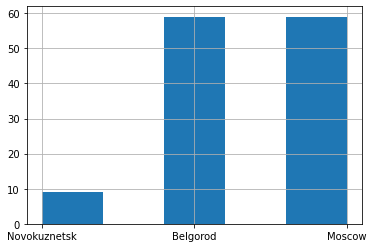

In [5]:
data.arrival_city.hist(bins=5)

### COMMENT:
- there only 3 flight durations
- let's have a deeper look into the statistik for this durations
- the same number of flights to Moscow and Belgorod

In [6]:
stat_by_duration = data.groupby(['arrival_city'])[['total_price',\
                                                    'avg_ticketprice',\
                                                    'nb_sold_tickets',\
                                                    'nb_seats_in_jet']]\
                        .agg(['min','mean', 'max', 'count'])\
                        .reset_index()

stat_by_duration.T

0            1             2
arrival_city           Belgorod       Moscow  Novokuznetsk
total_price     min      531000    1.398e+06           NaN
                mean     710436  1.64258e+06           NaN
                max      765300    1.886e+06           NaN
                count        59           59             0
avg_ticketprice min     7279.75      13624.3           NaN
                mean     7876.5        14521           NaN
                max     8296.88      15004.1           NaN
                count        59           59             0
nb_sold_tickets min          64           97           NaN
                mean    90.1864      113.119           NaN
                max          97          130           NaN
                count        59           59             0
nb_seats_in_jet min          97          130           130
                mean         97          130           130
                max          97          130           130
                count        59           59             9

### COMMETNS:
- there are no sold tickets to Novokuznetsk -> we have to reject this flight duration!!!
- there are two directions left: Moscow and Belgorog
- we can see that the number of sold tickts in Belgorod is lower than in Moscow, but the number of seats in jet in Balgorod is lower than to Moscow, thatswhy it's not clear at the first look which direction is better
- the ticket price to Mocsow is twice as much than to Belgorod, but it is explained by number of seats in the jet


In [7]:
#as we do not have any flight from Novokuznetsk we will set this information to 0
data = data.fillna(0)

Text(0, 0.5, 'total price per flight')

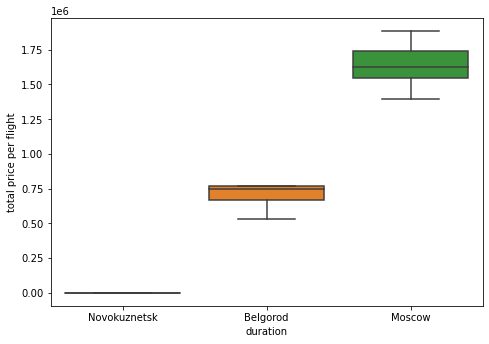

In [8]:
# check the numebr of sold tickets fo each duration
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
#axes.set_ylim(data.total_price.min(),(data.total_price.max()+10))
sns.boxplot(x = data['arrival_city'], y = data['total_price'])
# set axes description
axes.set_xlabel('duration')
axes.set_ylabel('total price per flight')

Text(0, 0.5, 'number of sold tickets')

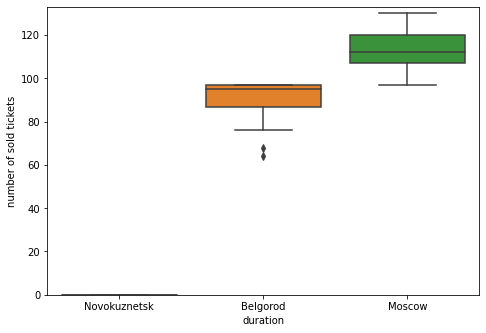

In [9]:
# check the numebr of sold tickets fo each duration
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.set_ylim(data.nb_sold_tickets.min(),(data.nb_sold_tickets.max()+3))
sns.boxplot(x = data['arrival_city'], y = data['nb_sold_tickets'])
# set axes description
axes.set_xlabel('duration')
axes.set_ylabel('number of sold tickets')

### COMMENTS:
- the same we can consider on the pics

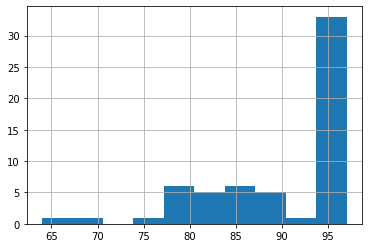

In [10]:
# let's check how ful are the jets by each direction
data[data['arrival_city']=='Belgorod']['nb_sold_tickets'].hist()

In [11]:
data.groupby(data[data['arrival_city']=='Belgorod']['nb_sold_tickets'])['nb_sold_tickets'].count()

nb_sold_tickets
64.0     1
68.0     1
76.0     1
78.0     2
79.0     3
80.0     1
81.0     2
82.0     2
83.0     1
86.0     1
87.0     5
88.0     2
89.0     1
90.0     2
91.0     1
94.0     3
95.0     4
96.0    10
97.0    16
Name: nb_sold_tickets, dtype: int64

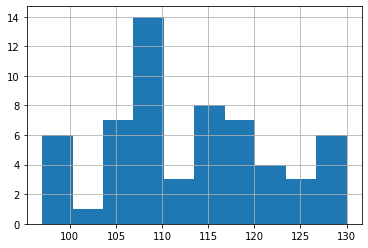

In [12]:
data[data['arrival_city']=='Moscow']['nb_sold_tickets'].hist()

### COMMENTS:
- we can see on the histograms above that about 50% of all flights to Belgorod are ful compared to Moscow (6 ful flights with 130 passanger)

In [13]:
# lets have a deeper look into how ful were the directions
belgorod = data[data['arrival_city']=='Belgorod'].groupby(['arrival_city','nb_sold_tickets'])['flight_id']\
                        .agg(['count'])\
                        .sort_values(by='nb_sold_tickets', ascending=True) \
                        .reset_index()
ful_jet = max(belgorod['nb_sold_tickets'])
belgorod['nb_sold_tickets_perc'] = belgorod['nb_sold_tickets'].apply(lambda x: round(x/ful_jet,2))
belgorod


,arrival_city,nb_sold_tickets,count,nb_sold_tickets_perc
0,Belgorod,64.0,1,0.66
1,Belgorod,68.0,1,0.70
2,Belgorod,76.0,1,0.78
3,Belgorod,78.0,2,0.80
4,Belgorod,79.0,3,0.81
5,Belgorod,80.0,1,0.82
6,Belgorod,81.0,2,0.84
7,Belgorod,82.0,2,0.85
8,Belgorod,83.0,1,0.86
9,Belgorod,86.0,1,0.89


In [14]:
moscow = data[data['arrival_city']=='Moscow'].groupby(['arrival_city','nb_sold_tickets'])['flight_id']\
                        .agg(['count'])\
                        .sort_values(by='nb_sold_tickets', ascending=True) \
                        .reset_index()
ful_jet = max(moscow['nb_sold_tickets'])
moscow['nb_sold_tickets_perc'] = moscow['nb_sold_tickets'].apply(lambda x: round(x/ful_jet,2))
moscow

,arrival_city,nb_sold_tickets,count,nb_sold_tickets_perc
0,Moscow,97.0,2,0.75
1,Moscow,99.0,2,0.76
2,Moscow,100.0,2,0.77
3,Moscow,103.0,1,0.79
4,Moscow,104.0,2,0.80
5,Moscow,105.0,1,0.81
6,Moscow,106.0,4,0.82
7,Moscow,107.0,3,0.82
8,Moscow,108.0,3,0.83
9,Moscow,109.0,4,0.84


### COMMENTS:
- we calculated the % relation of fullnes in jet per flight. For Belgorod it was prety clear, because the max number is near 100, but for Moscow not
- we have to figure out how many tickets do we have to sell, to cover flight costs
- for this reason we need information about the costs
- we habe the information like avg_aviakerosene_price. 
- let's check in internet the information regarding fuel consumption for each jet type 

In [15]:
#first of all look which jet type do we have and flight duration
aircr_range_fl_duration = data.groupby(['arrival_city', 'model'])[['aircraft_range', 'flight_duration']]\
                        .agg(['mean'])\
                        .reset_index()
aircr_range_fl_duration.T

,,0,1,2
arrival_city,,Belgorod,Moscow,Novokuznetsk
model,,Sukhoi Superjet-100,Boeing 737-300,Boeing 737-300
aircraft_range,mean,3000,4200,4200
flight_duration,mean,50,100,305


### COMMENT
- Duration to Novokuznetsk is the longest, about 305 min and due to this fact the company needs to sent Boeing 737-300 Novokuznetsk
- we saw earlier, that the prices to Mscow are more expensive that to Belgorod, but the flight duration is also twice as much (50 to 100 min)
- we have two tape of jets: Sukhoi Superjet-100	and Boeing 737-300
- Sukhoi Superjet-100 fuel comsumption is 1700 liter per hour
- Boeing 737-300 fuel comsumption is 3000 liter per hour


In [16]:
#create new column with fuel comsumption
def fuel_consumption_func(consumption):
    if consumption['model'] == 'Sukhoi Superjet-100':
        return 1700
    else:
        return 3000
data['fuel_consumption'] = data.apply(fuel_consumption_func, axis=1)

In [17]:
#check
data.groupby(['model', 'fuel_consumption'])['flight_id'].count()

model                fuel_consumption
Boeing 737-300       3000                68
Sukhoi Superjet-100  1700                59
Name: flight_id, dtype: int64

### FORMULA TO CALCULATE FLIGHT COSTS

**flight_costs =  fuel_consumption liter per hour * flight_duration (min) / 60 * avg_aviakerosene_price (2017)**

In [18]:
#caculate flight duration in hour
data['fuel_costs'] = data['fuel_consumption']\
                        * (data['flight_duration']/60)\
                        * data['avg_aviakerosene_price']


### CALCULATEION OF FLIGHT COSTS:
The main items of expenses that form the cost of the air ticket are 26% for
- passenger service,
- baggage and aircraft at the airport
About 26 % is spent on aviation fuel.

16% are spent on
- repair
- aircraft maintenance,
- insurance and
- leasing borrow

10% is the following expense item
- wages fund.

5% is spent on
- advertising and
- Administrative expenses
5% is spent on
- commissions and fees.
4% Air navigation charges and meteorological support account for the remaining 8% amortization.

Read more on RBC:
https://www.rbc.ru/opinions/economics/02/09/2015/55e701a89a7947d23bfb5e75

* fuel costs make only 26% of all costs per flight!!! 

**CALCULATE FLIGHT COSTS:**

flight_costs = fuel_costs*0.74/0.26 (other_costs) + fuel_costs

In [19]:
data['flight_costs'] = round(data['fuel_costs']*0.74/0.24 + data['fuel_costs'],0) # add flight costs

In [20]:
#calculate column with the inforamtion how much the company earns per flight
data['flight_earnings'] = data['total_price'] - data['flight_costs']


In [21]:
#select only flights were the company didn't earn the money
data[data['flight_earnings'] < 0][['flight_id', 'arrival_city','flight_costs']]

,flight_id,arrival_city,flight_costs
0,136523,Novokuznetsk,1893033.0
1,136567,Novokuznetsk,1893033.0
2,136546,Novokuznetsk,1893033.0
3,136540,Novokuznetsk,1893033.0
4,136511,Novokuznetsk,1893033.0
5,136544,Novokuznetsk,1893033.0
6,136560,Novokuznetsk,1893033.0
7,136514,Novokuznetsk,1893033.0
8,136513,Novokuznetsk,1893033.0


# INSIGHTS:

We analyzed all flight ID and duration and with exceprion of Novokuznetsk there are no flights with negative revenue. 
I would suggest to reject Novokuznetsk duration and keep all Moscow and Belgorod flights. There are some differences betwen revenue in this directions, but it is explained by flight duration. Flight from Anapa to moscoe is twice as much as flight from Anapa to Belgorod. Due to that fact the Jet's which we are using for this flight are different. Jats to Belgorod is smaller that Jet to Moscow. The flight to Belgorod are more fuled that to Moscow, but the revenue is nor negative and i would not recomend to reject one of this directions. The flight number which we have to reject are  following:

-    136523
-    136567
-    136546
-    136540
-    136511
-    136544
-    136560
-    136514
-    136513